The first thing to do is to read the file. To deal with the data, let’s import all the library we will be using in the project first and load the data. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the two data set. one for columns name and other for datasheet.
data = pd.read_csv('census-income.data', header= None)
col = pd.read_table('census-income.columns', header= None) 

data.columns = ['age',
'class of worker',
'detailed industry recode',
'detailed occupation recode',
'education',
'wage per hour',
'enroll in edu inst last wk',
'marital stat',
'major industry code',
'major occupation code',
'race',
'hispanic origin',
'sex',
'member of a labor union',
'reason for unemployment',
'full or part time employment stat',
'capital gains',
'capital losses',
'dividends from stocks',
'tax filer stat',
'region of previous residence',
'state of previous residence',
'detailed household and family stat',
'detailed household summary in household',
'instance weight',
'migration code-change in msa',
'migration code-change in reg',
'migration code-move within reg',
'live in this house 1 year ago',
'migration prev res in sunbelt',
'num persons worked for employer',
'family members under 18',
'country of birth father',
'country of birth mother',
'country of birth self',
'citizenship',
'own business or self employed',
'fill inc questionnaire for veterans admin',
'veterans benefits',
'weeks worked in year',
'year',
'label']

print ("Walmart dataset has {} samples with {} features.".format(*data.shape))

Walmart dataset has 199523 samples with 42 features.


# Data Exploration:

In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to one another.

In [2]:
data.sample(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veterans admin,veterans benefits,weeks worked in year,year,label
177192,29,Private,33,33,High school graduate,0,Not in universe,Married-civilian spouse present,Retail trade,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
115174,44,Private,32,38,High school graduate,775,Not in universe,Married-civilian spouse present,Wholesale trade,Transportation and material moving,...,Ecuador,Ecuador,Ecuador,Foreign born- Not a citizen of U S,0,Not in universe,2,52,94,- 50000.
28797,7,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,Mexico,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
59387,75,Not in universe,0,0,High school graduate,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
183209,8,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Peru,Peru,Peru,Foreign born- Not a citizen of U S,0,Not in universe,0,0,94,- 50000.


## Category Reduction

In [3]:
## creating a group called married
data['marital stat'] = data['marital stat'].replace(['Married-civilian spouse present','Married-spouse absent', 'Married-A F spouse present'], ['married','married','married'])

In [4]:
## Replacing values so that it will be easier to undestand
data['label'] = data['label'].replace(['- 50000.','50000+.'], ['<50','>50'])

## Basic Data Analysis
---------------------------

### <font color =  green> Duplicate values </font>

To check the duplicate values in the data

In [5]:
print("There are total {} Duplicate values in the data".format(data.duplicated().sum()))

data.drop_duplicates(inplace = True)

print("Data size after removing Duplicate entries are:" , data.shape[0])

There are total 3229 Duplicate values in the data
Data size after removing Duplicate entries are: 196294


### <font color =  green> Null/NA values </font>

Check whether there are missing values in each column.

In [6]:
# To check Null values 
print(data.isnull().sum())

age                                            0
class of worker                                0
detailed industry recode                       0
detailed occupation recode                     0
education                                      0
wage per hour                                  0
enroll in edu inst last wk                     0
marital stat                                   0
major industry code                            0
major occupation code                          0
race                                           0
hispanic origin                              870
sex                                            0
member of a labor union                        0
reason for unemployment                        0
full or part time employment stat              0
capital gains                                  0
capital losses                                 0
dividends from stocks                          0
tax filer stat                                 0
region of previous r

Hispanic origin column has 870 null values. But as i are not going to consider this column for classification,we are not removing the null values.

In [7]:
# To check data type of each columns.
print(data.dtypes)

age                                            int64
class of worker                               object
detailed industry recode                       int64
detailed occupation recode                     int64
education                                     object
wage per hour                                  int64
enroll in edu inst last wk                    object
marital stat                                  object
major industry code                           object
major occupation code                         object
race                                          object
hispanic origin                               object
sex                                           object
member of a labor union                       object
reason for unemployment                       object
full or part time employment stat             object
capital gains                                  int64
capital losses                                 int64
dividends from stocks                         

To quickly compute summary statistics and to identify anomalies,check statistical details of the dataset.

In [8]:
data.describe()   # describing the data

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year
count,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000
mean,34.929468,15.603187,11.490468,56.336505,441.870037,37.927593,200.722386,1743.267584,1.988105,0.178304,1.538183,23.553889,94.499328
std,22.210001,18.106401,14.498128,277.054333,4735.677027,274.081174,2000.130616,996.945985,2.371018,0.557739,0.836813,24.428588,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1061.530000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,34.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1620.175000,1.000000,0.000000,2.000000,12.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2194.060000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [9]:
print('Describe dataset for income >50k')
print(data[data.label == '>50k'].describe())
print('Describe dataset for income <50k')
print(data[data.label == '<50k'].describe())

Describe dataset for income >50k
       age  detailed industry recode  detailed occupation recode  \
count  0.0                       0.0                         0.0   
mean   NaN                       NaN                         NaN   
std    NaN                       NaN                         NaN   
min    NaN                       NaN                         NaN   
25%    NaN                       NaN                         NaN   
50%    NaN                       NaN                         NaN   
75%    NaN                       NaN                         NaN   
max    NaN                       NaN                         NaN   

       wage per hour  capital gains  capital losses  dividends from stocks  \
count            0.0            0.0             0.0                    0.0   
mean             NaN            NaN             NaN                    NaN   
std              NaN            NaN             NaN                    NaN   
min              NaN            NaN       

As mention in the description instance weight can be removed .

In [10]:
## Removing the 'na' values from the data.
print("Total row count before droping na: ", data.shape[0])
data = data.dropna()
print("Total row count after droping na: ", data.shape[0])

Total row count before droping na:  196294
Total row count after droping na:  195424


## Visualization of some column features
---------------------------
#### Barplot for the Dependent variable (label)

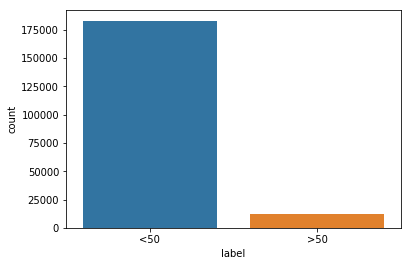

In [11]:
sns.countplot(x="label", data=data)   # countplot for label column.
plt.show()

In [12]:
print("Less than 50,000 Income percentage: ", 186324/(186324+12325) *100)
print("Greater than 50,000 Income percentage: ", 12325/(186324+12325) *100)

Less than 50,000 Income percentage:  93.79558920508032
Greater than 50,000 Income percentage:  6.204410794919682


<font color = red>Note</font>: There is a great difference in the distribution of data. statistic of people having salary < 50k is 94% while the people with the salary greater than 50k is just 6%. So before applying any machine learning algorithm, we need to deal with class **Imbalance Issue.**

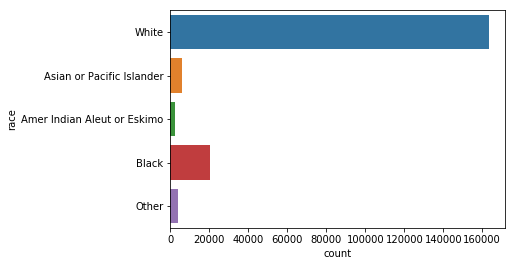

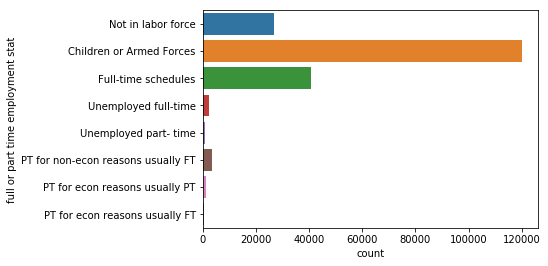

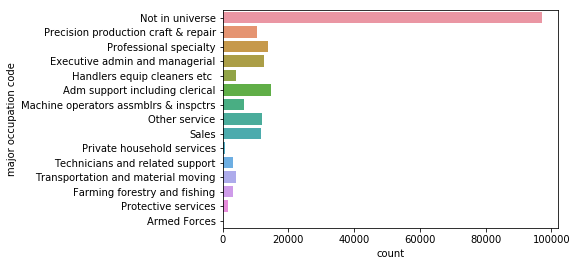

In [13]:
## count plot for Race 
sns.countplot(y="race", data=data)
plt.show()

## count plot for employement status 
sns.countplot(y="full or part time employment stat", data=data)
plt.show()

## count plot for major occupation code
sns.countplot(y="major occupation code", data=data)
plt.show()

**Observation**
1. There are more white people in data
2. The count of children and armed force is more.
3. Similarly, occupation code as not in universe is also more

## <font color = red>Class Imbalance Issue </font>

Up-sampling is the process of randomly **duplicating observations** from the **minority class**.
First, we'll import the resampling module from Scikit-Learn .Next, we'll create a new DataFrame with an up-sampled minority class.

So the steps are as follows :
> Separate observations from each class into different DataFrames.

> Resample the minority class with replacement, setting the number of samples to match that of the majority class.

>Up-sampled minority class DataFrame with the original majority class DataFrame.

In [14]:
from sklearn.utils import resample   # import library for sampling

In [15]:
data_grt =  data[data.label == '>50']
data_les =  data[data.label == '<50']

print('minority class shape:',data_grt.shape)
print('majority class shape:',data_les.shape) 

# Upsample >50,000 income group
grt_upsampled = resample(data_grt, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(data_les),    # to match majority class
                                 random_state=897) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_les, grt_upsampled])
 
# Display new class counts
print('After sampling class level count are:')
print(data_upsampled.label.value_counts())


minority class shape: (12325, 42)
majority class shape: (183099, 42)
After sampling class level count are:
>50    183099
<50    183099
Name: label, dtype: int64


## Implementation:  Feature Engineering
--------------------------

In [16]:
from sklearn.feature_selection import SelectKBest

Text(0,0.5,'Income')

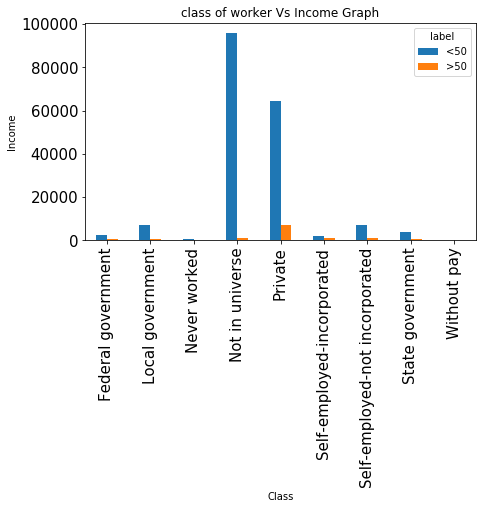

In [ ]:
# worker's class vs Income graph 
pd.crosstab(data['class of worker'],data.label).plot(kind='bar', fontsize = 15, figsize=(7,4))
plt.title('class of worker Vs Income Graph')
plt.xlabel('Class')
plt.ylabel('Income')

To Extract best feature, lets plot the histogam for each columns.
<font color= red>Below block takes time</font>

In [ ]:
for p in data.columns:
    pd.crosstab(data[p],data.label).plot(kind='bar', fontsize = 15, figsize=(7,4))
    plt.title(p + ' Vs Income Graph')
    plt.xlabel(p)
    plt.ylabel('Income')

C:\Users\Pruthwiraj\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
import matplotlib.pyplot as plt
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [ ]:
## for classification : https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/

From the bar graph we can see that 'class of worker', 
 'education', 'wage per hour',  'marital stat', 'enroll in edu inst last wk' , 'major occupation code', 'race','sex', 'member of a labor union', 'full or part time employment stat',
 'region of previous res'  can be a good predictor for deciding income.

#### If the distribution of certain variables are skewed, we can implement standardization.

https://amysfernweh.wordpress.com/2017/09/08/pythonprincipal-component-analysis-and-k-means-clustering-with-imdb-movie-datasets/

In [ ]:
data1 = data_upsampled[['age', 
 'class of worker', 
 'education',
 'wage per hour', 
 'marital stat', 'enroll in edu inst last wk' ,
 'major occupation code', 'race','sex',
 'member of a labor union',
 'full or part time employment stat',
 'region of previous residence',
 'detailed household summary in household',
 'num persons worked for employer','capital gains',
 'capital losses',
 'family members under 18',
 'instance weight',    
 'label']]
data1.head()

Check the unique values of each column

In [ ]:
def unique_counts(dat):
   for i in dat.columns:
       count = dat[i].nunique()
       print(i, ": ", count)
unique_counts(data1)

## Feature Correlation

We can examine the correlation among the features using Pearson correlation plot.

In [ ]:
# heatmap for correlation check
sns.heatmap(data1.corr(), annot=True)

### <font color = orange>Observation</font>

Variable are not much correlated, so we can apply the model

### Dummy Variable Creation 
------------------------
Before feeding data to logistic regression model, encoding of all the independent variables as dummy variables, allows easy interpretation and calculation and increases the stability and significance of the coefficients.

In [ ]:
data1 = pd.concat([data1, pd.get_dummies(data1['class of worker'], prefix='workerclass',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['education'], prefix='education',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['marital stat'], prefix='marital',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['enroll in edu inst last wk'], prefix='enroll_edu',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['major occupation code'], prefix='occupation',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['race'], prefix='race',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['sex'], prefix='sex',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['member of a labor union'], prefix='labor union',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['full or part time employment stat'], prefix='full/part employment',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['region of previous residence'], prefix='region',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['detailed household summary in household'], prefix='household summary',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['num persons worked for employer'], prefix='num persons worked for employer',prefix_sep=':')], axis=1)
data1 = pd.concat([data1, pd.get_dummies(data1['family members under 18'], prefix='family members under 18',prefix_sep=':')], axis=1)

In [ ]:
data1.drop('class of worker',axis=1,inplace=True)
data1.drop('education',axis=1,inplace=True)
data1.drop('marital stat',axis=1,inplace=True)
data1.drop('enroll in edu inst last wk',axis=1,inplace=True)
data1.drop('major occupation code',axis=1,inplace=True)
data1.drop('race',axis=1,inplace=True)
data1.drop('sex',axis=1,inplace=True)
data1.drop('member of a labor union',axis=1,inplace=True)
data1.drop('full or part time employment stat',axis=1,inplace=True)
data1.drop('region of previous residence',axis=1,inplace=True)
data1.drop('detailed household summary in household',axis=1,inplace=True)
data1.drop('num persons worked for employer',axis=1,inplace=True)
data1.drop('family members under 18',axis=1,inplace=True)

In [ ]:
sns.heatmap(data1.corr())  ## heat map after creating the dummy variable
plt.show()

### Logistic Regression Model
-----------------------------------------------------

Logistic regression can be used to model and solve this kind of binary classification problems. Here we get a probability score that reflects the probability of the occurrence of the event.

Before implementing logistic regression we need to make sure that data is satisfying all the underlying assumptions. 

Logistic Regression Assumptions:

> Binary logistic regression requires the dependent variable to be binary.

> For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

> Only the meaningful variables should be included.

> The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

> Logistic regression requires quite large sample sizes. Our data set is large enough. 

From the correlation graph and individual data analysis plot we found that all the assumptions are satisfied.
 


In [ ]:
data1['label'] = data1['label'].replace(['<50','>50'],[0,1]) # relabeling the label column as 0,1

### Data Shuffling and Splitting
Now all our categorical variables have been converted into numerical features, and all numerical features have been normalized. We now split the data into training and test sets. **75% of the data will be used for training and 25% for testing**

In [ ]:
# Import train_test_split from sklearn package
from sklearn.model_selection import train_test_split

# Spliting data frame
X = data1[data1.columns.difference(['label'])]  
Y = data1.label

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Show the results of the split
print ("Train set has {} samples.".format(x_train.shape[0]))
print ("Test set has {} samples.".format(x_test.shape[0]))

x_train and x_test variables contain explanatory column attributes. The y_train and y_test variable contain values from the 'label' column.


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape  # shape of newly created data frame

As we need to consider **instance weight** during the learning phase, lets first separate out that column and removing the column from both training and test data set.

In [ ]:
instance_Weight = x_train['instance weight']  # saving instance weight so that we can use it later

## removing instance weight from training and test set
x_train = x_train[x_train.columns.difference(['instance weight'])] 
x_test = x_test[x_test.columns.difference(['instance weight'])]  

# Show the results after emoving the instance weight column

print ("Train set shape",x_train.shape)
print ("Test set shape",x_test.shape)

Fitting Logistic Regression to the Training set

In [ ]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

## fit on training set 
model.fit(x_train, y_train, sample_weight = instance_Weight)

Now Predicting on using the Test data set

In [ ]:
prediction = model.predict(x_test)

## Model Evaluation:
--------------------------------------------

### Classification Accuracy:

The correct predictions to the total number of input samples

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
print( 'Accuracy Score: {0}'.format(accuracy_score(y_test, prediction)*100))

### Confusion Matrix

Confusion matrix allows to look at the particular misclassified examples. The confusion_matrix() function will calculate a confusion matrix and return the result as an array.

In [ ]:
print(confusion_matrix(y_test, prediction))

print('Number of correct predictions :',38227+40471)
print('Number of Incorrect predictions :',5073+7779)

### Classification Report

Classification report includes Precision, Recall and F1-Score.

**precision** = tp / (tp + fp)

**recall** = tp / (tp + fn) 

**F-beta** score can be interpreted as a weighted mean of the precision and recall.

In [ ]:
print(classification_report(y_test, prediction))

It appears from the classification report that the model had more precision in predicting individuals making less than 50K a year vs those making more and the recall (the proportion of actual positives was identified correctly) is vice vesa.

### ROC Curves and AUC 

As there are roughly equal numbers of observations for each class, we are using ROC curve.

In [ ]:
# import the required libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# extracting false positive, true positive rate.
fpr, tpr, thresholds = roc_curve(y_test, prediction)

## arer under the curve (AUC)
auc = roc_auc_score(y_test, prediction)
print('AUC:', auc)

## Plotting ROC Curve
pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False positive rate')
pyplot.ylabel('True positive rate')


## Customer Segmentation 

**Customer segmentation** is the process of dividing customers into groups based on common characteristics so that companies can **market to each group effectively and appropriately** .

### Objective:

The goal is to divide customers into groups that share certain characteristics.
 So we need to think carefully about the variables we will choose for clustering. Good exploratory research that gives us a good sense of what variables may distinguish people or products or assets or regions is critical. 

### Business Motive: 

Walmart wants to cluster the customer that share certain characteristics.The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. I have decided to take some time to dig more into data and see the features. From my experience, I found that the data set mostly contains **demographic data** such as  (e.g., age, gender, marital status, income).

I choose some continuous variable those make sense for clustering and planning to target the best customer for the market. From some research, I found that most customers of Walmart are middle & upper-income group who want best deals & discounts in order to purchase the necessities.

**My approach is to group people based on their age, wage per hour, week worked per year and capital profit i:e (net profit = capital gain-capital loss). The main goal is to identify high- and low-value customers for marketing purposes.**

Lastly, I’m using the k-means clustering technique because it can efficiently handle large datasets and iterates quickly to good solutions.

To keep things tidy, I restrict the date range to one full year.

In [ ]:
data = data[data['year'] == 95]  # take the data for year 95 only
data['gain'] = data['capital gains']-data['capital losses'] # calculate net gain from capital gain and capital loss

In [ ]:
X =  data[['age','wage per hour','weeks worked in year','gain']]  # new dataframe to group the customers

In [ ]:
pyplot.hist(X['gain'])   ## skwed

k-means clustering requires continuous variables and works best with relatively normally-distributed, standardized input variables. Standardizing the input variables is quite important; otherwise, input variables with larger variances will have commensurately greater influence on the results. Below, I transform our three input variables to reduce positive skew and then standardize them as z-scores.

## Preprocessing of Data


**Standadize the continouous dataset.**

In [ ]:
#Standardize
from scipy import stats
X_dat = stats.zscore(X)

In [ ]:
# Spliting data into 75-25 i:e 75% training data and 25% test data.
x_train_dat, x_test_dat = train_test_split(X, test_size=0.25, random_state=0)

# Standadize both training and test set
x_train = stats.zscore(x_train_dat)
x_test = x_test_dat.values

# geting the columns name
x_cols = x_train_dat.columns[1:]
x_cols

### Finding optimal number of cluster using elbow method
-----------------------------------------------------------------------
Before moving further.we need to first decide the number of cluster needs to be formed.
There is a way called the **elbow method** to find best value for K(Number of cluster) . In this method, we choose a different number of clusters and start plotting the within-cluster distance to the centroid.

In [ ]:
#Using the elbow method to find the optimum number of clusters
from sklearn.cluster import KMeans
wcss = []   ## WCSS (within-cluster sums of squares) will necessarily maximize the 
#                 distance between clusters.
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x_train)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Based on the elbow plot, we could choose between 4 and 6 clusters. I have choose the cluster to be 5.

### Visualization
---------------------------

We are going to use Principal Component Analysis to transform our multi-dimensional dataset into a 2 dimensional dataset

In [ ]:
from sklearn.decomposition import PCA  # import library
pca = PCA(n_components=2)  # set the number of components
x_train_2d = pca.fit_transform(x_train) # fit the training data

Using KMeans(), create a KMeans instance.To specify the number of clusters, use the n_clusters keyword argument

In [ ]:
## Lets take the numbe of cluster as 5
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)  #kmean
x_train_dat['Cluster'] = kmeans.fit_predict(x_train_2d)   # fit the transformed 2d training data
cluster_cust = x_train_dat['Cluster']

print("Number of clusters created are: ",x_train_dat['Cluster'].unique())

 Retail customers are majorly working class people in all age groups, people who are looking for value for money and daily products at a low price all the time.
 
 ### Ploting the 3D visualization
 --------------------------------

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # import Axes3D library
fig = plt.figure(figsize=(6, 4))   # set figure size
ax = Axes3D(fig)

ax.scatter(x_train[cluster_cust == 0, 0], x_train[cluster_cust == 0, 1], x_train[cluster_cust == 0, 2],x_train[cluster_cust == 0, 3],s = 10, c = 'red', label = 'Target Customer:middle class')
ax.scatter(x_train[cluster_cust == 1, 0], x_train[cluster_cust == 1, 1], x_train[cluster_cust == 1, 2],x_train[cluster_cust == 1, 3],s = 10, c = 'green', label = 'Teenager group')
ax.scatter(x_train[cluster_cust == 2, 0], x_train[cluster_cust == 2, 1], x_train[cluster_cust == 2, 2],x_train[cluster_cust == 2, 3],s = 10, c = 'blue', label = 'Target Customer:rich class')
ax.scatter(x_train[cluster_cust == 3, 0], x_train[cluster_cust == 3, 1], x_train[cluster_cust == 3, 2],x_train[cluster_cust == 3, 3],s = 10, c = 'yellow', label = 'Target Customer:high gain')
ax.scatter(x_train[cluster_cust == 4, 0], x_train[cluster_cust == 4, 1], x_train[cluster_cust == 4, 2],x_train[cluster_cust == 4, 3],s = 10, c = 'black', label = 'Old People')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], marker='*', c = 'yellow', s=100, alpha=0.5)
plt.legend()
plt.show()

Cluster after applying PCA.

In [ ]:
#Define our own color map
LABEL_COLOR_MAP = {0:'red', 1: 'green', 2: 'blue',3:'orange',4:'black'}
label_color = [LABEL_COLOR_MAP[l] for l in cluster_cust]

# Plot the scatter diagram
plt.figure(figsize = (7,7))   # set the dimension for the figure
plt.scatter(x_train_2d[:,0],x_train_2d[:,1], c= label_color, alpha=0.5)   # give data
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## Cluster statistic [How one cluster is different from the other]
---------------------------

Now we will be digging a little deeper into the clusters. Here we will break out all clusters and compare it to the remaining cluster, we can start to look for interesting facets that we might be able to exploit.

As a baseline, we can check the age range for cluster 5 vs. everyone else.

In [ ]:
pd.DataFrame(x_train_dat.groupby(['Cluster']).mean())

In [ ]:
pd.DataFrame(cluster_cust.value_counts())

The plot shows the distribution of the 5 clusters. We could interpret them as the following customer segments:

### Cluster Inerpetation 
-------------------------------------

**Cluster 1 (Middle-class Target Profile):** Medium wage per hour (23) but mostly they are employed for the whole year (I:e week worked in a year) is 50 and net gain is also moderate. The average age of this group of people is around 40. This group can be called as Medium Profile group and these can be the target group for retail marketing.people here are 28718

So in regards to the market, these people should be targeted to market for an exclusive product and not the normal product. 


**Cluster 2 (Teenager Profile):** Low wage per hour and very less week worked in a year with average age 12. The gain is -ve. All these things imply that most people in this group might be students and careless as we can see the gain is -ve. This group might not be a targeted group for retail marketing 

**Cluster 3(high-class target profile):** These group of people has a high wage, high work per year, moderate capital gain. This group can be the target group as the wage per hour is moderate, age group lies around 40 and these people have worked throughout the year. This group can also be one of the targeted group. These people might be wealthy, So in regards to the market, these people should be targeted to market for an exclusive product and not the normal product. The customer here is 2898

**Cluster 4(Target profile):** These group of people has less wage, high work per year, High capital gain. This group can be the target group as the wage per hour is less but the gain is also high. Age group lies around 46 and these people have worked throughout the year. As they have high gain Wallmart might find promotion/offer related to that. Very fewer people are in this group, around 158

**Cluster 5(Old profile):** People this group has an average age of 60,  less wage and less week worked per year, low capital gain. This group might not be the target group due to their age. The survey says that less customer old age.


### Testing
------------------------------------
Now that we have fit our K means algorithm we can run it our testing data.

In [ ]:
x_test_2d = pca.fit_transform(x_test) 
cluster_cust = kmeans.fit_predict(x_test_2d)
fig = plt.figure(figsize=(10, 8))
ax1 = Axes3D(fig)

ax1.scatter(x_test[cluster_cust == 0, 0], x_test[cluster_cust == 0, 1], x_test[cluster_cust == 0, 2],x_test[cluster_cust == 0, 3],s = 10, c = 'red', label = 'Target Customer:middle class')
ax1.scatter(x_test[cluster_cust == 1, 0], x_test[cluster_cust == 1, 1], x_test[cluster_cust == 1, 2],x_test[cluster_cust == 1, 3],s = 10, c = 'green', label = 'Teenager group')
ax1.scatter(x_test[cluster_cust == 2, 0], x_test[cluster_cust == 2, 1], x_test[cluster_cust == 2, 2],x_test[cluster_cust == 2, 3],s = 10, c = 'blue', label = 'Target Customer:rich class')
ax1.scatter(x_test[cluster_cust == 3, 0], x_test[cluster_cust == 3, 1], x_test[cluster_cust == 3, 2],x_test[cluster_cust == 3, 3],s = 10, c = 'yellow', label = 'Target Customer:high gain')
ax1.scatter(x_test[cluster_cust == 4, 0], x_test[cluster_cust == 4, 1], x_test[cluster_cust == 4, 2],x_test[cluster_cust == 4, 3],s = 10, c = 'black', label = 'Old People')

plt.legend()
plt.show()

The predict() method of model to predict the cluster labels of new_points, assigning the result to new_labels. Notice that KMeans can assign previously unseen points to the clusters it has already found!